In [1]:
#Tasks - Module 7 -- Time Series Analysis

#Loading necessary packages

import pandas as pd
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from pandas import Series
import statsmodels.api as sm
from scipy import stats
from matplotlib.dates import DateFormatter
import scipy.stats as scp
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn import preprocessing

In [2]:
#Task 1

#Reading in the necessary dataset

unemployment = pd.read_csv("unemployment.csv", header=None, parse_dates=True, dayfirst=True)

unemployment.columns = ['Unemployed','Time']

unemployment.describe

<bound method NDFrame.describe of      Unemployed       Time
0   1645.985983  1/01/1978
1   1660.177361  1/01/1979
2   1693.068156  1/01/1980
3   1721.856278  1/01/1981
4   1709.993418  1/01/1982
5   1677.252634  1/01/1983
6   1729.786248  1/01/1984
7   1779.235402  1/01/1985
8   1852.562854  1/01/1986
9   1914.724445  1/01/1987
10  1951.199790  1/01/1988
11  2047.551133  1/01/1989
12  2080.784702  1/01/1990
13  1977.285140  1/01/1991
14  1945.745793  1/01/1992
15  1927.242003  1/01/1993
16  1973.388107  1/01/1994
17  2042.219028  1/01/1995
18  2074.830004  1/01/1996
19  2084.796919  1/01/1997
20  2128.671170  1/01/1998
21  2147.912166  1/01/1999
22  2210.435848  1/01/2000
23  2258.213364  1/01/2001
24  2289.858764  1/01/2002
25  2336.755980  1/01/2003
26  2379.047731  1/01/2004
27  2452.668615  1/01/2005
28  2508.722959  1/01/2006
29  2593.985222  1/01/2007
30  2651.108117  1/01/2008
31  2677.020057  1/01/2009
32  2757.763188  1/01/2010
33  2812.280197  1/01/2011
34  2831.198010  1/01

In [3]:
#Converting Time column to Datetime64 type
unemployment['Time']=pd.to_datetime(unemployment['Time'], format='%d/%m/%Y')

unemployment.dtypes

Unemployed           float64
Time          datetime64[ns]
dtype: object

In [4]:
#Setting the index of the dataframe to the Time column
unemployment.set_index('Time', inplace=True)
#There is no need to convert the column to ts object as in R - setting to index would suffice

In [5]:
unemployment.head()

,Unemployed
Time,
1978-01-01,1645.985983
1979-01-01,1660.177361
1980-01-01,1693.068156
1981-01-01,1721.856278
1982-01-01,1709.993418


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


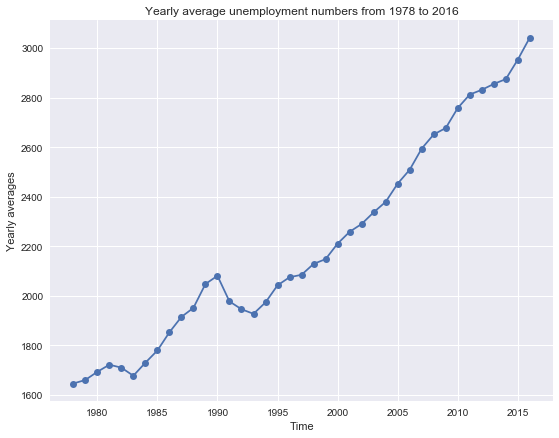

In [6]:
#Plotting the time series data

plt.style.use('seaborn')

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(unemployment.index.values, unemployment['Unemployed'],'-o')
ax.set(xlabel="Time",ylabel="Yearly averages",title="Yearly average unemployment numbers from 1978 to 2016")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# In the time series plot there is trend, no seasonality and no changing 
# variance and succeeding observations imply the existence of autoregressive 
# behavior.

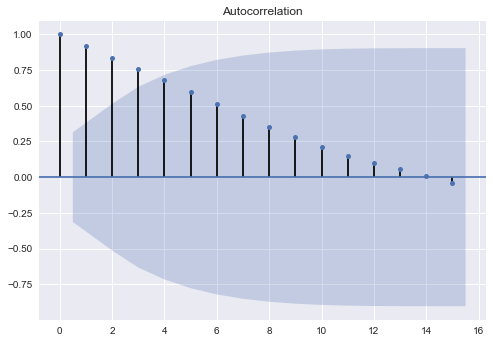

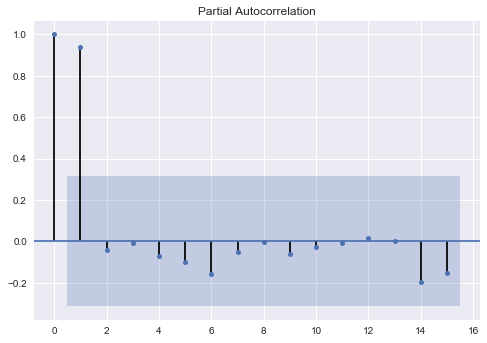

In [7]:
#Creating the ACF and PACF plots of the unemployment series

sm.graphics.tsa.plot_acf(unemployment.Unemployed, lags=15);
sm.graphics.tsa.plot_pacf(unemployment.Unemployed, lags=15);

# Slowly decaying pattern in ACF and very high first correlation in PACF
# implies the existence of trend and nonstationarity.

In [8]:
#Transforming the series

unemployment_transformed, lambda_= stats.boxcox(unemployment.Unemployed) #Automatically transforms the data with the best lambda value

print("lambda=",lambda_)

unemployment_transformed = pd.DataFrame(unemployment_transformed)

#Setting the index of the data frame
unemployment_transformed.index=unemployment.index

unemployment_transformed.columns = ['unemployment_transformed']

unemployment_transformed

# Here the lambda value is different from 1, so we go with the transformation (different from R)

lambda= -0.7173174684644411


,unemployment_transformed
Time,
1978-01-01,1.387211
1979-01-01,1.387253
1980-01-01,1.387348
1981-01-01,1.387429
1982-01-01,1.387396
1983-01-01,1.387303
1984-01-01,1.387451
1985-01-01,1.387584
1986-01-01,1.387770


In [9]:
unemployment.head()

,Unemployed
Time,
1978-01-01,1645.985983
1979-01-01,1660.177361
1980-01-01,1693.068156
1981-01-01,1721.856278
1982-01-01,1709.993418


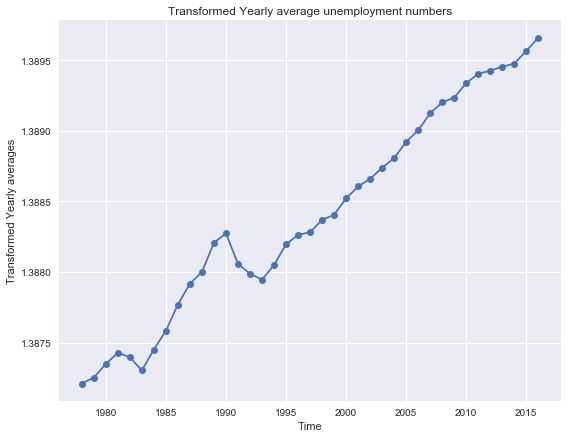

In [10]:
#Plotting the transformed unemployment time series

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(unemployment_transformed.index.values, unemployment_transformed['unemployment_transformed'],'-o')
ax.set(xlabel="Time",ylabel="Transformed Yearly averages",title="Transformed Yearly average unemployment numbers")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# There is still some trend in ther series

In [11]:
#Taking the first difference of the transformed unemployment series

differenced_unemployment = pd.DataFrame(Series.diff(unemployment_transformed['unemployment_transformed'], 1))

differenced_unemployment.columns = ['differenced_unemployment']

differenced_unemployment.head()

,differenced_unemployment
Time,
1978-01-01,NaN
1979-01-01,0.000042
1980-01-01,0.000095
1981-01-01,0.000081
1982-01-01,-0.000033


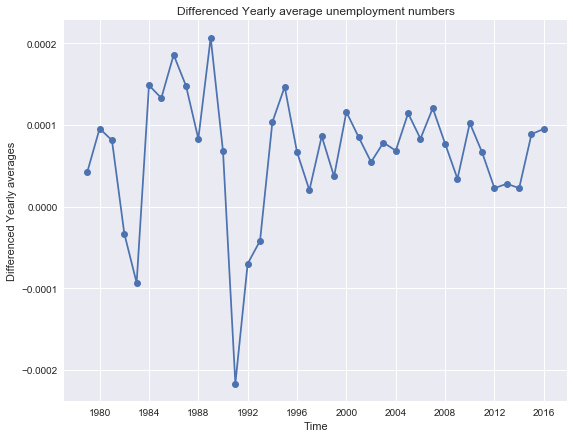

In [12]:
#Plotting the differenced time series

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(differenced_unemployment.index.values, differenced_unemployment['differenced_unemployment'],'-o')
ax.set(xlabel="Time",ylabel="Differenced Yearly averages",title="Differenced Yearly average unemployment numbers")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# There is still some trend in ther series

In [13]:
#Removing the first NA value
differenced_unemployment_clean = differenced_unemployment.iloc[1:]

differenced_unemployment_clean.head()

,differenced_unemployment
Time,
1979-01-01,0.000042
1980-01-01,0.000095
1981-01-01,0.000081
1982-01-01,-0.000033
1983-01-01,-0.000093


In [14]:
#Conducting the ADF unit root test to confirm stationarity

ADF_test = adfuller(differenced_unemployment_clean.differenced_unemployment)
print(ADF_test)
print('ADF Statistic:           %f' % (ADF_test[0]))
print('p-value:                 %f' % (ADF_test[1]))

# ADF test confirms with the p-value of 0.27 that the series is still non-stationary at 1% level of significance.
# So we will apply the second differencing.

(-2.02060756676437, 0.27761113042135493, 7, 30, {'1%': -3.6699197407407405, '5%': -2.9640707407407407, '10%': -2.621171111111111}, -441.5769070234225)
ADF Statistic:           -2.020608
p-value:                 0.277611


In [15]:
#Taking the second order difference of the transformed unemployment series

differenced2_unemployment = pd.DataFrame(Series.diff(differenced_unemployment['differenced_unemployment'], 1))

differenced2_unemployment.columns = ['differenced2_unemployment']

differenced2_unemployment.head()

,differenced2_unemployment
Time,
1978-01-01,NaN
1979-01-01,NaN
1980-01-01,0.000053
1981-01-01,-0.000014
1982-01-01,-0.000114


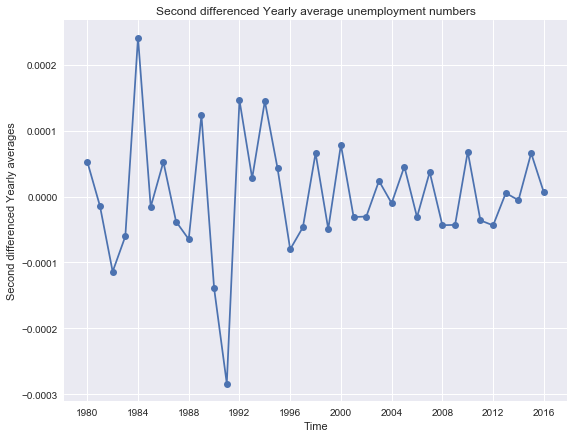

In [16]:
#Plotting the second differenced unemployment time series

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(differenced2_unemployment.index.values, differenced2_unemployment['differenced2_unemployment'],'-o')
ax.set(xlabel="Time",ylabel="Second differenced Yearly averages",title="Second differenced Yearly average unemployment numbers")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# There is no trend in the series

In [17]:
#Removing the first two NA values
differenced2_unemployment_clean = differenced2_unemployment.iloc[2:]

differenced2_unemployment_clean.head()

,differenced2_unemployment
Time,
1980-01-01,0.000053
1981-01-01,-0.000014
1982-01-01,-0.000114
1983-01-01,-0.000060
1984-01-01,0.000242


In [18]:
#Conducting the ADF unit root test to confirm stationarity

ADF_test = adfuller(differenced2_unemployment_clean.differenced2_unemployment)
print(ADF_test)
print('ADF Statistic:           %f' % (ADF_test[0]))
print('p-value:                 %f' % (ADF_test[1]))

# ADF test confirms with the p-value of 0.00 that the series becomes stationary at 
# 5% level of significance with the second differencing. 

(-4.909776389116109, 3.337803795909215e-05, 6, 30, {'1%': -3.6699197407407405, '5%': -2.9640707407407407, '10%': -2.621171111111111}, -420.0634105381801)
ADF Statistic:           -4.909776
p-value:                 0.000033


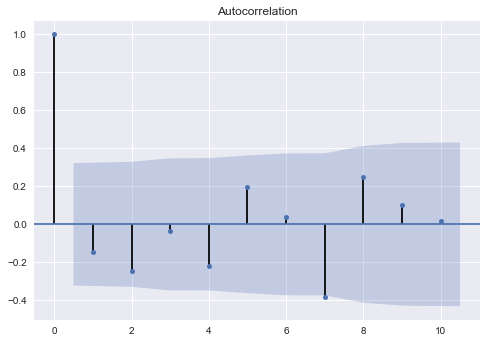

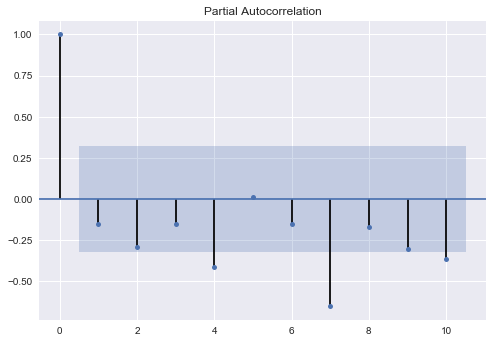

In [19]:
#Creating the ACF and PACF plots of the second order differenced unemployment series

sm.graphics.tsa.plot_acf(differenced2_unemployment_clean, lags=10);
sm.graphics.tsa.plot_pacf(differenced2_unemployment_clean, lags=10);

# There is one significant lag in ACF and two significant lags in PACF.
# So we can include ARIMA(2,2,1) model among the candidate models.

In [20]:
#There is no method to produce EACF plot in Python

In [21]:
#There is no method to produce the BIC plot in Python

In [22]:
#As EACF and BIC plots cannot be created - the set of candidate models can be decided using only ACF and PACF.

#The final set of possible models is {ARIMA(2,2,1), ARIMA(2,2,0), ARIMA(1,2,1)}

In [23]:
#Fitting ARIMA (2,2,1) using CSS method 

model1 = ARIMA(unemployment_transformed['unemployment_transformed'], order=(2,2,1))
model1_fit1_css = model1.fit(method='css',disp=0)
print(model1_fit1_css.summary()) #Equivalent of coeftest function in R to display the model results


                                  ARIMA Model Results                                  
Dep. Variable:     D2.unemployment_transformed   No. Observations:                   37
Model:                          ARIMA(2, 2, 1)   Log Likelihood                 278.041
Method:                                    css   S.D. of innovations              0.000
Date:                         Thu, 06 Feb 2020   AIC                           -546.082
Time:                                 19:20:59   BIC                           -538.305
Sample:                             01-01-1982   HQIC                          -543.398
                                  - 01-01-2016                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              3.663e-07   9.61e-06      0.038      0.970   -1.85e-05   

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/opt/anaconda3/lib/python

In [24]:
#Fitting ARIMA (2,2,1) using MLE method 

model1 = ARIMA(unemployment_transformed['unemployment_transformed'], order=(2,2,1))
model1_fit1_mle = model1.fit(method='mle',disp=0)
print(model1_fit1_mle.summary()) #Equivalent of coeftest function in R to display the model1 results

#Saving the order, AIC, BIC results
ar1 = model1_fit1_mle.k_ar
ma1 = model1_fit1_mle.k_ma
AIC1 = model1_fit1_mle.aic
BIC1 = model1_fit1_mle.bic

#Creating a dataframe to hold the results
col_names =  ['p', 'q', 'AIC','BIC']
order_aic_bic1 = pd.DataFrame(columns = col_names)
order_aic_bic1.loc[len(order_aic_bic1)] = [ar1, ma1, AIC1, BIC1]

order_aic_bic1

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                                  ARIMA Model Results                                  
Dep. Variable:     D2.unemployment_transformed   No. Observations:                   37
Model:                          ARIMA(2, 2, 1)   Log Likelihood                 298.711
Method:                                    mle   S.D. of innovations              0.000
Date:                         Thu, 06 Feb 2020   AIC                           -587.422
Time:                                 19:20:59   BIC                           -579.368
Sample:                             01-01-1980   HQIC                          -584.583
                                  - 01-01-2016                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              2.958e-07   1.36e-06      0.218      0.829   -2.37e-06   

,p,q,AIC,BIC
0,2.0,1.0,-587.422387,-579.367798


In [25]:
#Fitting ARIMA (2,2,0) using CSS method

model1 = ARIMA(unemployment_transformed['unemployment_transformed'], order=(2,2,0))
model1_fit2_css = model1.fit(method='css',disp=0)
print(model1_fit2_css.summary()) #Equivalent of coeftest function in R to display the model1 results


                                  ARIMA Model Results                                  
Dep. Variable:     D2.unemployment_transformed   No. Observations:                   37
Model:                          ARIMA(2, 2, 0)   Log Likelihood                 277.852
Method:                                    css   S.D. of innovations              0.000
Date:                         Thu, 06 Feb 2020   AIC                           -547.703
Time:                                 19:20:59   BIC                           -541.482
Sample:                             01-01-1982   HQIC                          -545.555
                                  - 01-01-2016                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              1.289e-07   9.81e-06      0.013      0.990   -1.91e-05   

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [26]:
#Fitting ARIMA (2,2,0) using MLE method 

model1 = ARIMA(unemployment_transformed['unemployment_transformed'], order=(2,2,0))
model1_fit2_mle = model1.fit(method='mle',disp=0)
print(model1_fit2_mle.summary()) #Equivalent of coeftest function in R to display the model1 results

#Saving the order, AIC, BIC results
ar2 = model1_fit2_mle.k_ar
ma2 = model1_fit2_mle.k_ma
AIC2 = model1_fit2_mle.aic
BIC2 = model1_fit2_mle.bic

order_aic_bic1.loc[len(order_aic_bic1)] = [ar2, ma2, AIC2, BIC2]

order_aic_bic1

                                  ARIMA Model Results                                  
Dep. Variable:     D2.unemployment_transformed   No. Observations:                   37
Model:                          ARIMA(2, 2, 0)   Log Likelihood                 294.489
Method:                                    mle   S.D. of innovations              0.000
Date:                         Thu, 06 Feb 2020   AIC                           -580.977
Time:                                 19:20:59   BIC                           -574.534
Sample:                             01-01-1980   HQIC                          -578.706
                                  - 01-01-2016                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              6.789e-07   9.68e-06      0.070      0.945   -1.83e-05   

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


,p,q,AIC,BIC
0,2.0,1.0,-587.422387,-579.367798
1,2.0,0.0,-580.977347,-574.533675


In [27]:
#Fitting ARIMA (1,2,1) using CSS method returns an error: "The computed initial AR coefficients are not stationary
#You should induce stationarity, choose a different model1 order, or you can
#pass your own start_params""

#model1 = ARIMA(unemployment_transformed['unemployment_transformed'], order=(1,2,1))
#model1_fit3_css = model1.fit(method='css',disp=0)
#print(model1_fit3_css.summary()) #Equivalent of coeftest function in R to display the model1 results


In [28]:
#Fitting ARIMA (1,2,1) using MLE method returns an error: "The computed initial AR coefficients are not stationary
#You should induce stationarity, choose a different model1 order, or you can
#pass your own start_params""

#model1 = ARIMA(unemployment_transformed['unemployment_transformed'], order=(1,2,1))
#model1_fit3_mle = model1.fit(method='mle',disp=0)
#print(model1_fit3_mle.summary()) #Equivalent of coeftest function in R to display the model1 results



In [29]:
#ARIMA (2,2,1) is the model with all significant coefficients.

#Trying out overfitting model ARIMA (2,2,2) and ARIMA (3,2,1)

In [30]:
#Fitting ARIMA (2,2,2) using CSS method

model1 = ARIMA(unemployment_transformed['unemployment_transformed'], order=(2,2,2))
model1_fit4_css = model1.fit(method='css',disp=0)

print(model1_fit4_css.summary()) #Equivalent of coeftest function in R to display the model1 results


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                                  ARIMA Model Results                                  
Dep. Variable:     D2.unemployment_transformed   No. Observations:                   37
Model:                          ARIMA(2, 2, 2)   Log Likelihood                 283.020
Method:                                    css   S.D. of innovations              0.000
Date:                         Thu, 06 Feb 2020   AIC                           -554.041
Time:                                 19:21:00   BIC                           -544.708
Sample:                             01-01-1982   HQIC                          -550.819
                                  - 01-01-2016                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -1.188e-06   9.46e-06     -0.126      0.901   -1.97e-05   

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [31]:
#Fitting ARIMA (2,2,2) using MLE method

model1 = ARIMA(unemployment_transformed['unemployment_transformed'], order=(2,2,2))
model1_fit4_mle = model1.fit(method='mle',disp=0)

print(model1_fit4_mle.summary()) #Equivalent of coeftest function in R to display the model1 results
#Returns nan for most coefficients

#Saving the order, AIC, BIC results
ar4 = model1_fit4_mle.k_ar
ma4 = model1_fit4_mle.k_ma
AIC4 = model1_fit4_mle.aic
BIC4 = model1_fit4_mle.bic

#Adding the record to the existing dataframe
order_aic_bic1.loc[len(order_aic_bic1)] = [ar4, ma4, AIC4, BIC4]

order_aic_bic1

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                                  ARIMA Model Results                                  
Dep. Variable:     D2.unemployment_transformed   No. Observations:                   37
Model:                          ARIMA(2, 2, 2)   Log Likelihood                 296.052
Method:                                    mle   S.D. of innovations              0.000
Date:                         Thu, 06 Feb 2020   AIC                           -580.104
Time:                                 19:21:00   BIC                           -570.438
Sample:                             01-01-1980   HQIC                          -576.696
                                  - 01-01-2016                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              7.081e-07   3.63e-06      0.195      0.846    -6.4e-06   

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


,p,q,AIC,BIC
0,2.0,1.0,-587.422387,-579.367798
1,2.0,0.0,-580.977347,-574.533675
2,2.0,2.0,-580.103682,-570.438174


In [32]:
#Fitting ARIMA (3,2,1) using CSS method

model1 = ARIMA(unemployment_transformed['unemployment_transformed'], order=(3,2,1))
model1_fit5_css = model1.fit(method='css',disp=0)

print(model1_fit5_css.summary()) #Equivalent of coeftest function in R to display the model1 results


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                                  ARIMA Model Results                                  
Dep. Variable:     D2.unemployment_transformed   No. Observations:                   37
Model:                          ARIMA(3, 2, 1)   Log Likelihood                 271.356
Method:                                    css   S.D. of innovations              0.000
Date:                         Thu, 06 Feb 2020   AIC                           -530.713
Time:                                 19:21:00   BIC                           -521.555
Sample:                             01-01-1983   HQIC                          -527.590
                                  - 01-01-2016                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              1.951e-06   5.81e-06      0.336      0.740   -9.44e-06   

In [33]:
#Fitting ARIMA (3,2,1) using MLE method

model1 = ARIMA(unemployment_transformed['unemployment_transformed'], order=(3,2,1))
model1_fit5_mle = model1.fit(method='mle',disp=0)

print(model1_fit5_mle.summary()) #Equivalent of coeftest function in R to display the model1 results
#Returns nan for most coefficients

#Saving the order, AIC, BIC results
ar5 = model1_fit5_mle.k_ar
ma5 = model1_fit5_mle.k_ma
AIC5 = model1_fit5_mle.aic
BIC5 = model1_fit5_mle.bic

#Adding the record to the existing dataframe
order_aic_bic1.loc[len(order_aic_bic1)] = [ar5, ma5, AIC5, BIC5]

order_aic_bic1

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                                  ARIMA Model Results                                  
Dep. Variable:     D2.unemployment_transformed   No. Observations:                   37
Model:                          ARIMA(3, 2, 1)   Log Likelihood                 298.129
Method:                                    mle   S.D. of innovations              0.000
Date:                         Thu, 06 Feb 2020   AIC                           -584.258
Time:                                 19:21:00   BIC                           -574.593
Sample:                             01-01-1980   HQIC                          -580.851
                                  - 01-01-2016                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              3.333e-07   1.39e-06      0.240      0.812   -2.39e-06   

,p,q,AIC,BIC
0,2.0,1.0,-587.422387,-579.367798
1,2.0,0.0,-580.977347,-574.533675
2,2.0,2.0,-580.103682,-570.438174
3,3.0,1.0,-584.258262,-574.592755


In [34]:
#Based on signifance of coefficients and AIC, BIC values, we can conclude the best model specification is with ARIMA (2,2,1).

#Sorting the results by AIC and BIC scores

# Sort by AIC
print(order_aic_bic1.sort_values('AIC'))

# Sort by BIC
print(order_aic_bic1.sort_values('BIC'))

     p    q         AIC         BIC
0  2.0  1.0 -587.422387 -579.367798
3  3.0  1.0 -584.258262 -574.592755
1  2.0  0.0 -580.977347 -574.533675
2  2.0  2.0 -580.103682 -570.438174
     p    q         AIC         BIC
0  2.0  1.0 -587.422387 -579.367798
3  3.0  1.0 -584.258262 -574.592755
1  2.0  0.0 -580.977347 -574.533675
2  2.0  2.0 -580.103682 -570.438174


In [35]:
#Checking residuals - The ARIMA function does not have a single function for viewing the residual plots all at once 
#therefore, the standardised residuals plot, QQ plot, histogram and ACF plots are to be done manually 
#as done in previous weeks' tasks.

#Getting the residuals for the fitted ARIMA model
influence = pd.DataFrame(model1_fit1_mle.resid)

#Standardising the residuals for plotting
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fitting the data on the scaler object to get the standardised residuals
scaled_df = pd.DataFrame(scaler.fit_transform(influence))
scaled_df.head()

,0
0,0.675561
1,-0.180314
2,-1.254981
3,-0.992535
4,2.243877


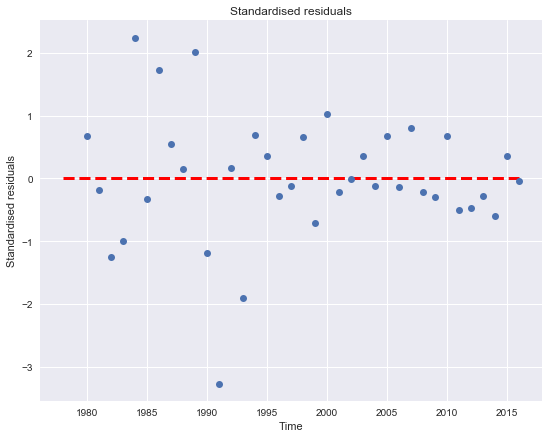

In [36]:
#Plotting the standardised residuals

fig,ax=plt.subplots(figsize=(9,7))

#Plotting like to like points since two differencing was carried out on the transformed data
ax.plot(unemployment_transformed[2:].index.values, scaled_df,'o')
ax.set(xlabel="Time",ylabel="Standardised residuals",title="Standardised residuals")

#To get the horizontal zero line
xmin=min(unemployment_transformed.index.values)
xmax=max(unemployment_transformed.index.values)
ax.hlines(y=0,xmin=xmin,xmax=xmax,color='red',linestyle='--',lw=3)

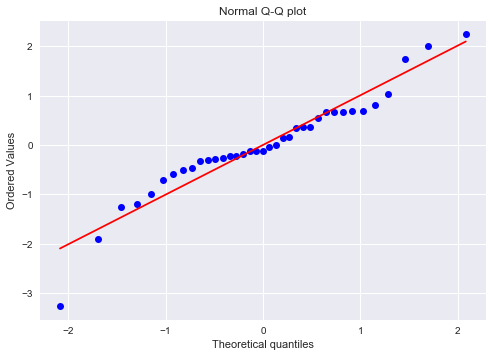

In [37]:
#Checking normality of the residuals using QQ plot

influence = pd.Series(model1_fit1_mle.resid)

z = (influence-np.mean(influence))/np.std(influence)

scp.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()


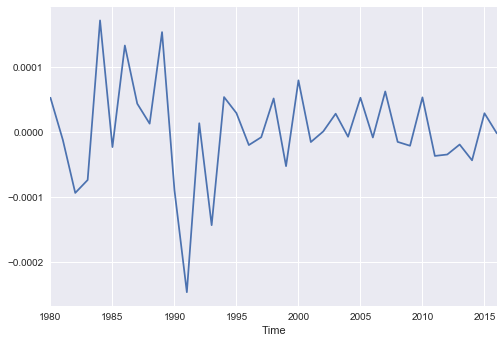

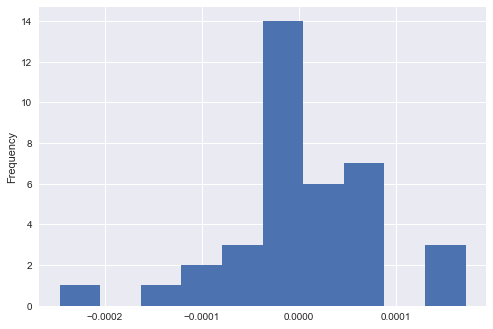

count    37.000000
mean      0.000002
std       0.000077
min      -0.000246
25%      -0.000023
50%      -0.000007
75%       0.000052
max       0.000172
dtype: float64


In [38]:
#Plotting histogram of residuals

influence.plot()
plt.show()
influence.plot(kind='hist')
#To get density curve form, use kind = 'kde'
plt.show()
print(influence.describe())

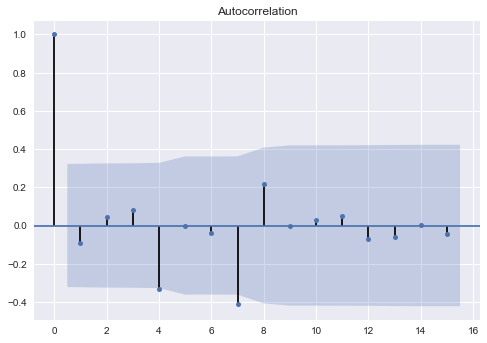

In [39]:
#Creating the ACF plot of the residuals

sm.graphics.tsa.plot_acf(influence, lags=15);


In [40]:
#The diagnostic plots of the residuals seems ok. We can proceed with ARIMA (2,2,1) for forecasting.

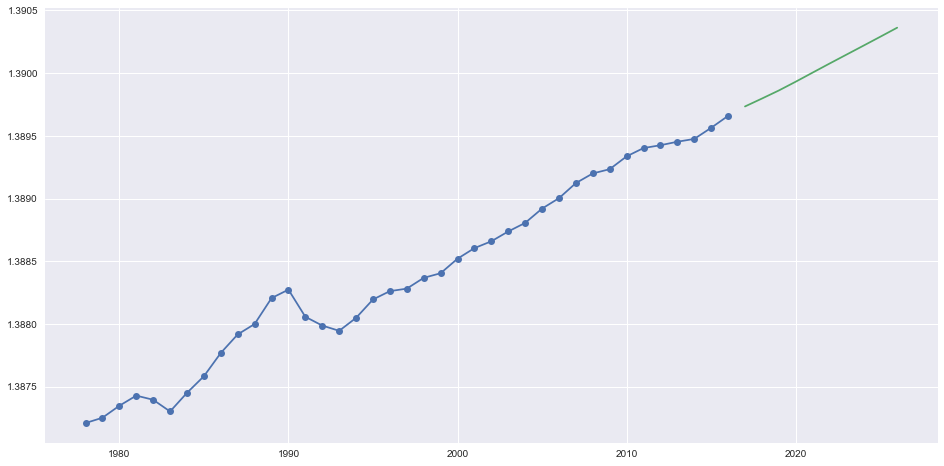

In [41]:
# Forecasting using predict function - for defined periods
# Unlike in R, there is no easy function to convert the differenced and transformed series into the original scale
# It needs to be manually converted to the original scale

n_periods = 10
fc_pre = model1_fit1_mle.predict('2017-01-01','2026-01-01', typ='levels')
#typ='levels' allows the predictions to be in the original and not differenced format

#Plotting the forecast with the transformed series input data
plt.figure(figsize=(16,8))
plt.plot(unemployment_transformed.unemployment_transformed,'-o',)
plt.plot(fc_pre)
plt.show()

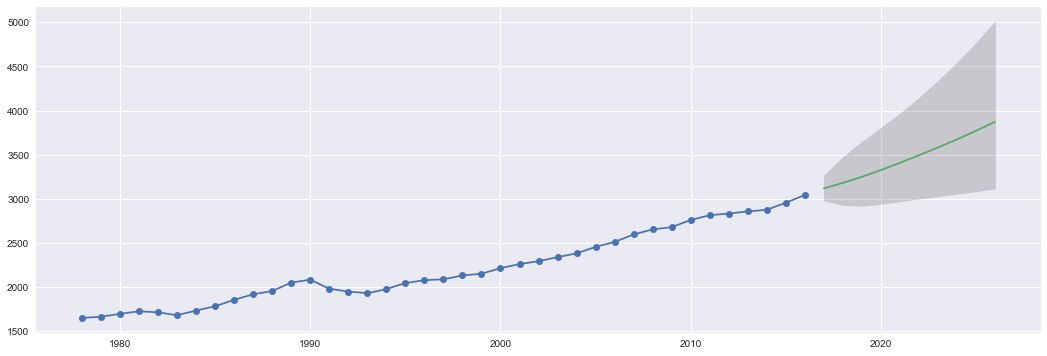

In [42]:
# Forecasting using forecast function - for number of steps ahead
# Unlike in R, there is no easy function to convert the transformed series into the original scale 
# in the forecast function - it needs to be manually converted to the original scale

#Number of ahead steps
n_periods = 10
fc,se,confint = model1_fit1_mle.forecast(n_periods)

index_of_fc = pd.date_range(start='2017-01-01', freq='YS',periods=10) #include dates for the periods ahead
fc_series = pd.DataFrame(fc, index=index_of_fc)

lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Taking back the transformation for the forecasted values manually to get it into the original scale
from scipy.special import boxcox, inv_boxcox

#We use inv_boxcox on the transformed series to get the original series back
#For this, we need to provide the lambda value used to transform the series at first

fc_series_original = pd.DataFrame(inv_boxcox(fc_series, lambda_))
lower_series = inv_boxcox(lower_series, lambda_)
upper_series = inv_boxcox(upper_series, lambda_)

#Plotting the forecast with the original series input data
plt.figure(figsize=(18,6))
plt.plot(unemployment,'-o')
plt.plot(fc_series_original)
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.show()

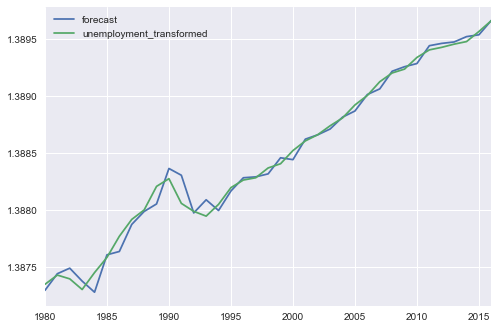

In [43]:
#We can use plot_predict to show us the fitted vs actual values (but this gives the transformed version)

model1_fit1_mle.plot_predict(dynamic=False)
plt.show()

In [44]:
#Optional chunk - Taking back the differencing manually

periods = 1 #order of differencing
df=unemployment_transformed #original time series used for differencing
differenced = df.diff(periods=periods) #differenced time series
restored = df.copy()
restored.iloc[periods:] = np.nan
for d, value in differenced.iloc[periods:].iterrows():
    restored.loc[d] = restored.loc[d - pd.DateOffset(years=periods)].values + value
    
final = pd.concat([differenced, restored], axis=1)
final.columns = ['differenced', 'restored']

final.head()

,differenced,restored
Time,,
1978-01-01,NaN,1.387211
1979-01-01,0.000042,1.387253
1980-01-01,0.000095,1.387348
1981-01-01,0.000081,1.387429
1982-01-01,-0.000033,1.387396


In [45]:
#Task 2

#Reading in the necessary dataset

arima_data = pd.read_csv("data.sim.csv", header=None, parse_dates=True, dayfirst=True)

arima_data.columns = ['sim','time']

arima_data.describe

<bound method NDFrame.describe of            sim        time
0     0.000000  01/01/1794
1    -0.398143  01/01/1795
2    -2.317668  01/01/1796
3    -1.094310  01/01/1797
4    -1.195734  01/01/1798
..         ...         ...
196 -22.753910  01/01/1990
197 -22.623528  01/01/1991
198 -24.458687  01/01/1992
199 -23.715935  01/01/1993
200 -23.872219  01/01/1994

[201 rows x 2 columns]>

In [46]:
#Converting Time column to Datetime64 type
arima_data['time']=pd.to_datetime(arima_data['time'], format='%d/%m/%Y')

arima_data.dtypes

sim            float64
time    datetime64[ns]
dtype: object

In [47]:
#Setting the index of the dataframe to the Time column
arima_data.set_index('time', inplace=True)
#There is no need to convert the column to ts object as in R - setting to index would suffice

In [48]:
arima_data.head()

,sim
time,
1794-01-01,0.000000
1795-01-01,-0.398143
1796-01-01,-2.317668
1797-01-01,-1.094310
1798-01-01,-1.195734


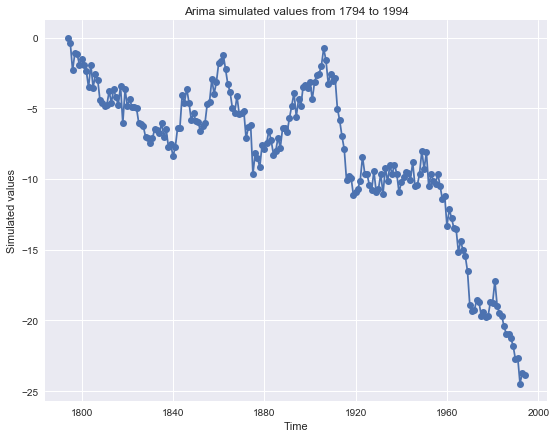

In [49]:
#Plotting the time series data

plt.style.use('seaborn')

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(arima_data.index.values, arima_data['sim'],'-o')
ax.set(xlabel="Time",ylabel="Simulated values",title="Arima simulated values from 1794 to 1994")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# In the time series plot there is trend, no clear seasonality, o changing 
# variance and succeeding observations imply the existence of autoregressive 
# behavior.

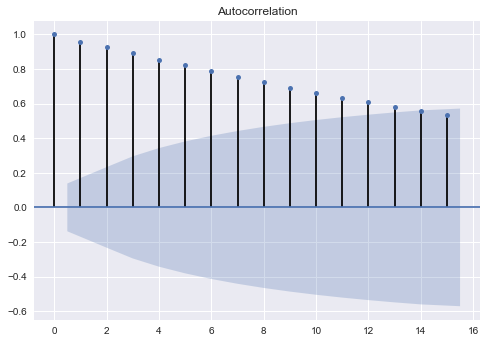

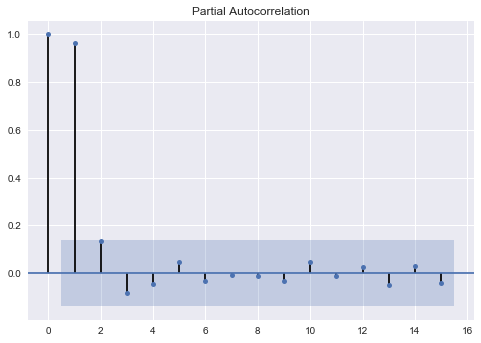

In [50]:
#Creating the ACF and PACF plots of the unemployment series

sm.graphics.tsa.plot_acf(arima_data.sim, lags=15);
sm.graphics.tsa.plot_pacf(arima_data.sim, lags=15);

# Slowly decaying pattern in ACF and very high first correlation in PACF
# implies the existence of trend and nonstationarity.

In [51]:
#Adding 1 to the minimum value of the series to make it all positive

arima_data['sim'] = arima_data['sim']+abs(arima_data['sim'].min())+1 

arima_data.head()

,sim
time,
1794-01-01,25.458687
1795-01-01,25.060544
1796-01-01,23.141019
1797-01-01,24.364378
1798-01-01,24.262953


In [52]:
#Transforming the series

arimadata_transformed, lambda1_= stats.boxcox(arima_data) #Automatically transforms the data with the best lambda value

print("lambda=",lambda1_)

arimadata_transformed = pd.DataFrame(arimadata_transformed)

#Setting the index of the data frame
arimadata_transformed.index=arima_data.index

arimadata_transformed.columns = ['arimadata_transformed']

arimadata_transformed

# Here the lambda value is different from 1, so we go with the transformation (different from R)

lambda= [1.88940308]


,arimadata_transformed
time,
1794-01-01,239.280169
1795-01-01,232.243594
1796-01-01,199.707513
1797-01-01,220.177254
1798-01-01,218.444558
...,...
1990-01-01,2.939268
1991-01-01,3.261932
1992-01-01,0.000000


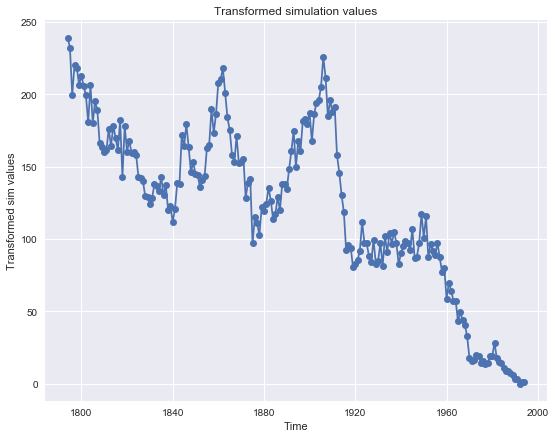

In [53]:
#Plotting the transformed arimadata time series

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(arimadata_transformed.index.values, arimadata_transformed['arimadata_transformed'],'-o')
ax.set(xlabel="Time",ylabel="Transformed sim values",title="Transformed simulation values")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# There is still some trend in ther series

In [54]:
#Taking the first difference of the transformed unemployment series

differenced_arima = pd.DataFrame(Series.diff(arimadata_transformed['arimadata_transformed'], 1))

differenced_arima.columns = ['differenced_arima']

differenced_arima.head()

,differenced_arima
time,
1794-01-01,NaN
1795-01-01,-7.036575
1796-01-01,-32.536082
1797-01-01,20.469741
1798-01-01,-1.732695


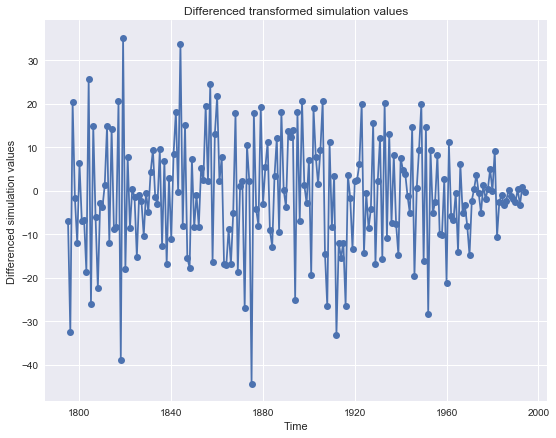

In [55]:
#Plotting the differenced time series

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(differenced_arima.index.values, differenced_arima['differenced_arima'],'-o')
ax.set(xlabel="Time",ylabel="Differenced simulation values",title="Differenced transformed simulation values")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# There is still some trend in ther series

In [56]:
#Removing the first NA value for use with ACF and PACF plots
differenced_arima_clean = differenced_arima.iloc[1:]

differenced_arima_clean.head()

,differenced_arima
time,
1795-01-01,-7.036575
1796-01-01,-32.536082
1797-01-01,20.469741
1798-01-01,-1.732695
1799-01-01,-11.955670


In [57]:
#Conducting the ADF unit root test to confirm stationarity

ADF_test = adfuller(differenced_arima_clean.differenced_arima)
print(ADF_test)
print('ADF Statistic:           %f' % (ADF_test[0]))
print('p-value:                 %f' % (ADF_test[1]))

# ADF test confirms with the p-value of 0.00 that the series becomes stationary at 
# 5% level of significance with the first differencing. 

(-6.555235469712543, 8.649702623151006e-09, 3, 196, {'1%': -3.464161278384219, '5%': -2.876401960790147, '10%': -2.5746921001665974}, 1438.0827301929571)
ADF Statistic:           -6.555235
p-value:                 0.000000


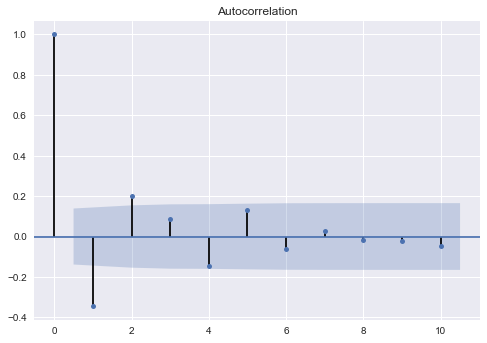

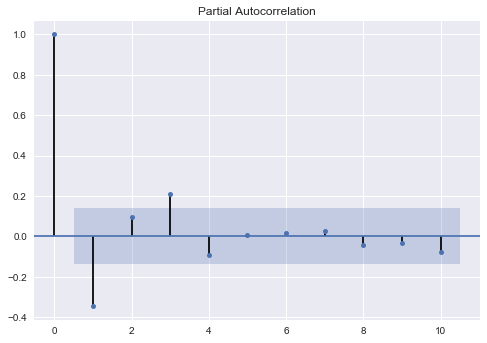

In [58]:
#Creating the ACF and PACF plots of the first order differenced arima data series

sm.graphics.tsa.plot_acf(differenced_arima_clean, lags=10);
sm.graphics.tsa.plot_pacf(differenced_arima_clean, lags=10);

# There are two significant lag in ACF and two significant lags in PACF.
# So we can include ARIMA(2,1,2) model among the candidate models.

In [59]:
#There is no method to produce EACF plot in Python

In [60]:
#There is no method to produce the BIC plot in Python

In [61]:
#As EACF and BIC plots cannot be created - the set of candidate models can be decided using only ACF and PACF.

#The final set of possible models is {ARIMA(2,1,2), ARIMA(2,1,1), ARIMA(1,1,2), ARIMA(1,1,1)}

In [62]:
arimadata_transformed['arimadata_transformed']

time
1794-01-01    239.280169
1795-01-01    232.243594
1796-01-01    199.707513
1797-01-01    220.177254
1798-01-01    218.444558
                 ...    
1990-01-01      2.939268
1991-01-01      3.261932
1992-01-01      0.000000
1993-01-01      0.982436
1994-01-01      0.736550
Name: arimadata_transformed, Length: 201, dtype: float64

In [63]:
#Fitting ARIMA (2,1,2) using CSS method 

model2 = ARIMA(arimadata_transformed['arimadata_transformed'], order=(2,1,2))
model2_fit1_css = model2.fit(method='css',disp=0)
print(model2_fit1_css.summary()) #Equivalent of coeftest function in R to display the model results


                                ARIMA Model Results                                
Dep. Variable:     D.arimadata_transformed   No. Observations:                  200
Model:                      ARIMA(2, 1, 2)   Log Likelihood                -768.350
Method:                                css   S.D. of innovations             11.724
Date:                     Thu, 06 Feb 2020   AIC                           1548.699
Time:                             19:21:03   BIC                           1568.429
Sample:                         01-01-1797   HQIC                          1556.685
                              - 01-01-1994                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.1082      0.730     -1.518      0.131      -2.539       0.322
ar.L1.D.arimadata_transformed    -

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [64]:
#Fitting ARIMA (2,1,2) using MLE method 

model2 = ARIMA(arimadata_transformed['arimadata_transformed'], order=(2,1,2))
model2_fit1_mle = model2.fit(method='mle',disp=0)
print(model2_fit1_mle.summary()) #Equivalent of coeftest function in R to display the model results

#Saving the order, AIC, BIC results
ar1 = model2_fit1_mle.k_ar
ma1 = model2_fit1_mle.k_ma
AIC1 = model2_fit1_mle.aic
BIC1 = model2_fit1_mle.bic

#Creating a dataframe to hold the results
col_names =  ['p', 'q', 'AIC','BIC']
order_aic_bic2 = pd.DataFrame(columns = col_names)
order_aic_bic2.loc[len(order_aic_bic2)] = [ar1, ma1, AIC1, BIC1]

order_aic_bic2

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                                ARIMA Model Results                                
Dep. Variable:     D.arimadata_transformed   No. Observations:                  200
Model:                      ARIMA(2, 1, 2)   Log Likelihood                -781.138
Method:                                mle   S.D. of innovations             12.014
Date:                     Thu, 06 Feb 2020   AIC                           1574.276
Time:                             19:21:03   BIC                           1594.066
Sample:                         01-01-1795   HQIC                          1582.285
                              - 01-01-1994                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.2096      0.737     -1.642      0.102      -2.653       0.234
ar.L1.D.arimadata_transformed    -

,p,q,AIC,BIC
0,2.0,2.0,1574.276432,1594.066336


In [65]:
#Fitting ARIMA (2,1,1) using CSS method

model2 = ARIMA(arimadata_transformed['arimadata_transformed'], order=(2,1,1))
model2_fit2_css = model2.fit(method='css',disp=0)
print(model2_fit2_css.summary()) #Equivalent of coeftest function in R to display the model results


                                ARIMA Model Results                                
Dep. Variable:     D.arimadata_transformed   No. Observations:                  200
Model:                      ARIMA(2, 1, 1)   Log Likelihood                -774.804
Method:                                css   S.D. of innovations             12.112
Date:                     Thu, 06 Feb 2020   AIC                           1559.608
Time:                             19:21:03   BIC                           1576.049
Sample:                         01-01-1797   HQIC                          1566.263
                              - 01-01-1994                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.0179      0.724     -1.406      0.161      -2.437       0.401
ar.L1.D.arimadata_transformed    -

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [66]:
#Fitting ARIMA (2,1,1) using MLE method 

model2 = ARIMA(arimadata_transformed['arimadata_transformed'], order=(2,1,1))
model2_fit2_mle = model2.fit(method='mle',disp=0)
print(model2_fit2_mle.summary()) #Equivalent of coeftest function in R to display the model results

#Saving the order, AIC, BIC results
ar2 = model2_fit2_mle.k_ar
ma2 = model2_fit2_mle.k_ma
AIC2 = model2_fit2_mle.aic
BIC2 = model2_fit2_mle.bic

order_aic_bic2.loc[len(order_aic_bic2)] = [ar2, ma2, AIC2, BIC2]

order_aic_bic2

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                                ARIMA Model Results                                
Dep. Variable:     D.arimadata_transformed   No. Observations:                  200
Model:                      ARIMA(2, 1, 1)   Log Likelihood                -784.157
Method:                                mle   S.D. of innovations             12.199
Date:                     Thu, 06 Feb 2020   AIC                           1578.313
Time:                             19:21:03   BIC                           1594.805
Sample:                         01-01-1795   HQIC                          1584.987
                              - 01-01-1994                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.2221      0.849     -1.439      0.152      -2.887       0.443
ar.L1.D.arimadata_transformed     

,p,q,AIC,BIC
0,2.0,2.0,1574.276432,1594.066336
1,2.0,1.0,1578.313346,1594.804932


In [67]:
#Fitting ARIMA (1,1,2) using CSS method 

model2 = ARIMA(arimadata_transformed['arimadata_transformed'], order=(1,1,2))
model2_fit3_css = model2.fit(method='css',disp=0)
print(model2_fit3_css.summary()) #Equivalent of coeftest function in R to display the model results


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                                ARIMA Model Results                                
Dep. Variable:     D.arimadata_transformed   No. Observations:                  200
Model:                      ARIMA(1, 1, 2)   Log Likelihood                -778.081
Method:                                css   S.D. of innovations             12.074
Date:                     Thu, 06 Feb 2020   AIC                           1566.161
Time:                             19:21:03   BIC                           1582.628
Sample:                         01-01-1796   HQIC                          1572.826
                              - 01-01-1994                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.1376      0.832     -1.368      0.173      -2.768       0.493
ar.L1.D.arimadata_transformed    -

In [68]:
#Fitting ARIMA (1,1,2) using MLE method 

model2 = ARIMA(arimadata_transformed['arimadata_transformed'], order=(1,1,2))
model2_fit3_mle = model2.fit(method='mle',disp=0)
print(model2_fit3_mle.summary()) #Equivalent of coeftest function in R to display the model results

#Saving the order, AIC, BIC results
ar3 = model2_fit3_mle.k_ar
ma3 = model2_fit3_mle.k_ma
AIC3 = model2_fit3_mle.aic
BIC3 = model2_fit3_mle.bic

order_aic_bic2.loc[len(order_aic_bic2)] = [ar3, ma3, AIC3, BIC3]

order_aic_bic2

                                ARIMA Model Results                                
Dep. Variable:     D.arimadata_transformed   No. Observations:                  200
Model:                      ARIMA(1, 1, 2)   Log Likelihood                -782.139
Method:                                mle   S.D. of innovations             12.075
Date:                     Thu, 06 Feb 2020   AIC                           1574.278
Time:                             19:21:04   BIC                           1590.769
Sample:                         01-01-1795   HQIC                          1580.952
                              - 01-01-1994                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.2225      0.825     -1.481      0.140      -2.840       0.395
ar.L1.D.arimadata_transformed    -

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


,p,q,AIC,BIC
0,2.0,2.0,1574.276432,1594.066336
1,2.0,1.0,1578.313346,1594.804932
2,1.0,2.0,1574.277614,1590.769200


In [69]:
#Fitting ARIMA (1,1,1) using CSS method

model2 = ARIMA(arimadata_transformed['arimadata_transformed'], order=(1,1,1))
model2_fit4_css = model2.fit(method='css',disp=0)

print(model2_fit4_css.summary()) #Equivalent of coeftest function in R to display the model results


                                ARIMA Model Results                                
Dep. Variable:     D.arimadata_transformed   No. Observations:                  200
Model:                      ARIMA(1, 1, 1)   Log Likelihood                -782.638
Method:                                css   S.D. of innovations             12.353
Date:                     Thu, 06 Feb 2020   AIC                           1573.276
Time:                             19:21:04   BIC                           1586.449
Sample:                         01-01-1796   HQIC                          1578.607
                              - 01-01-1994                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.1856      0.670     -1.771      0.078      -2.498       0.127
ar.L1.D.arimadata_transformed    -

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [70]:
#Fitting ARIMA (1,1,1) using MLE method

model2 = ARIMA(arimadata_transformed['arimadata_transformed'], order=(1,1,1))
model2_fit4_mle = model2.fit(method='mle',disp=0)

print(model2_fit4_mle.summary()) #Equivalent of coeftest function in R to display the model results
#Returns nan for most coefficients

#Saving the order, AIC, BIC results
ar4 = model2_fit4_mle.k_ar
ma4 = model2_fit4_mle.k_ma
AIC4 = model2_fit4_mle.aic
BIC4 = model2_fit4_mle.bic

#Adding the record to the existing dataframe
order_aic_bic2.loc[len(order_aic_bic2)] = [ar4, ma4, AIC4, BIC4]

order_aic_bic2

                                ARIMA Model Results                                
Dep. Variable:     D.arimadata_transformed   No. Observations:                  200
Model:                      ARIMA(1, 1, 1)   Log Likelihood                -786.105
Method:                                mle   S.D. of innovations             12.320
Date:                     Thu, 06 Feb 2020   AIC                           1580.210
Time:                             19:21:04   BIC                           1593.404
Sample:                         01-01-1795   HQIC                          1585.550
                              - 01-01-1994                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.1913      0.672     -1.772      0.078      -2.509       0.126
ar.L1.D.arimadata_transformed    -

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


,p,q,AIC,BIC
0,2.0,2.0,1574.276432,1594.066336
1,2.0,1.0,1578.313346,1594.804932
2,1.0,2.0,1574.277614,1590.769200
3,1.0,1.0,1580.210394,1593.403664


In [71]:
#Going by significance of coefficients, ARIMA (2,1,2) is the one with all significant coefficients (by CSS method)
#Also by AIC/BIC values, the ARIMA (2,1,2) is the best model.

#Trying the overfitting models ARIMA (2,1,3) and ARIMA (3,1,2)

In [72]:
#Fitting ARIMA (2,1,3) using CSS method

model2 = ARIMA(arimadata_transformed['arimadata_transformed'], order=(2,1,3))
model2_fit5_css = model2.fit(method='css',disp=0)

print(model2_fit5_css.summary()) #Equivalent of coeftest function in R to display the model results


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                                ARIMA Model Results                                
Dep. Variable:     D.arimadata_transformed   No. Observations:                  200
Model:                      ARIMA(2, 1, 3)   Log Likelihood                -768.283
Method:                                css   S.D. of innovations             11.720
Date:                     Thu, 06 Feb 2020   AIC                           1550.566
Time:                             19:21:04   BIC                           1573.583
Sample:                         01-01-1797   HQIC                          1559.882
                              - 01-01-1994                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.1043      0.752     -1.469      0.143      -2.578       0.369
ar.L1.D.arimadata_transformed    -

In [73]:
#Fitting ARIMA (2,1,3) using MLE method

model2 = ARIMA(arimadata_transformed['arimadata_transformed'], order=(2,1,3))
model2_fit5_mle = model2.fit(method='mle',disp=0)

print(model2_fit5_mle.summary()) #Equivalent of coeftest function in R to display the model results
#Returns nan for most coefficients

#Saving the order, AIC, BIC results
ar5 = model2_fit5_mle.k_ar
ma5 = model2_fit5_mle.k_ma
AIC5 = model2_fit5_mle.aic
BIC5 = model2_fit5_mle.bic

#Adding the record to the existing dataframe
order_aic_bic2.loc[len(order_aic_bic2)] = [ar5, ma5, AIC5, BIC5]

order_aic_bic2

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                                ARIMA Model Results                                
Dep. Variable:     D.arimadata_transformed   No. Observations:                  200
Model:                      ARIMA(2, 1, 3)   Log Likelihood                -780.145
Method:                                mle   S.D. of innovations             11.953
Date:                     Thu, 06 Feb 2020   AIC                           1574.290
Time:                             19:21:04   BIC                           1597.378
Sample:                         01-01-1795   HQIC                          1583.633
                              - 01-01-1994                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.2189      0.792     -1.539      0.125      -2.771       0.333
ar.L1.D.arimadata_transformed    -

,p,q,AIC,BIC
0,2.0,2.0,1574.276432,1594.066336
1,2.0,1.0,1578.313346,1594.804932
2,1.0,2.0,1574.277614,1590.769200
3,1.0,1.0,1580.210394,1593.403664
4,2.0,3.0,1574.289807,1597.378029


In [74]:
#Going by the significance of coefficients and the AIC/BIC values, ARIMA (2,1,2) is still the best model

#Sorting the results by AIC and BIC scores

# Sort by AIC
print(order_aic_bic2.sort_values('AIC'))

# Sort by BIC
print(order_aic_bic2.sort_values('BIC'))

     p    q          AIC          BIC
0  2.0  2.0  1574.276432  1594.066336
2  1.0  2.0  1574.277614  1590.769200
4  2.0  3.0  1574.289807  1597.378029
1  2.0  1.0  1578.313346  1594.804932
3  1.0  1.0  1580.210394  1593.403664
     p    q          AIC          BIC
2  1.0  2.0  1574.277614  1590.769200
3  1.0  1.0  1580.210394  1593.403664
0  2.0  2.0  1574.276432  1594.066336
1  2.0  1.0  1578.313346  1594.804932
4  2.0  3.0  1574.289807  1597.378029


In [75]:
model2_fit1_css.resid

time
1797-01-01   -4.445096
1798-01-01    1.660482
1799-01-01    0.994647
1800-01-01   -2.207791
1801-01-01   -5.279236
                ...   
1990-01-01   -2.457088
1991-01-01    1.616248
1992-01-01   -1.227735
1993-01-01    0.862888
1994-01-01    1.634016
Length: 198, dtype: float64

In [76]:
#Checking residuals - The ARIMA function does not have a single function for viewing the residual plots all at once 
#therefore, the standardised residuals plot, QQ plot, histogram and ACF plots are to be done manually 
#as done in previous weeks' tasks.

#Getting the residuals for the fitted ARIMA model
influence1 = pd.DataFrame(model2_fit1_css.resid)

#Standardising the residuals for plotting
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fitting the data on the scaler object to get the standardised residuals
scaled_df1 = pd.DataFrame(scaler.fit_transform(influence1))
scaled_df1.head()

,0
0,-0.380040
1,0.140748
2,0.083954
3,-0.189204
4,-0.451190


In [77]:
influence1

,0
time,
1797-01-01,-4.445096
1798-01-01,1.660482
1799-01-01,0.994647
1800-01-01,-2.207791
1801-01-01,-5.279236
...,...
1990-01-01,-2.457088
1991-01-01,1.616248
1992-01-01,-1.227735


In [78]:
arimadata_transformed

,arimadata_transformed
time,
1794-01-01,239.280169
1795-01-01,232.243594
1796-01-01,199.707513
1797-01-01,220.177254
1798-01-01,218.444558
...,...
1990-01-01,2.939268
1991-01-01,3.261932
1992-01-01,0.000000


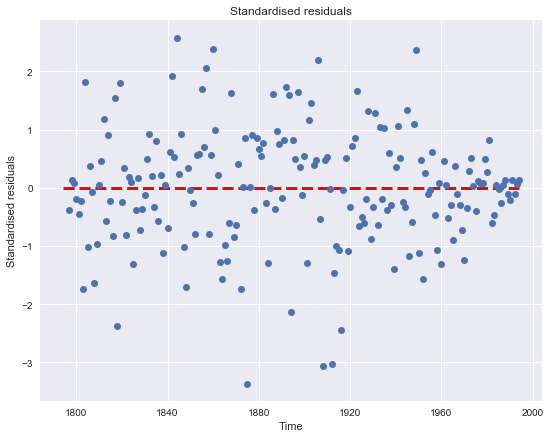

In [79]:
#Plotting the standardised residuals

fig,ax=plt.subplots(figsize=(9,7))

#Plotting like to like points since one differencing was carried out on the transformed data and CSS method ignores
#by default the first 2 observations = highest order of AR term
ax.plot(arimadata_transformed[3:].index.values, scaled_df1,'o')
ax.set(xlabel="Time",ylabel="Standardised residuals",title="Standardised residuals")

#To get the horizontal zero line
xmin=min(arimadata_transformed.index.values)
xmax=max(arimadata_transformed.index.values)
ax.hlines(y=0,xmin=xmin,xmax=xmax,color='red',linestyle='--',lw=3)

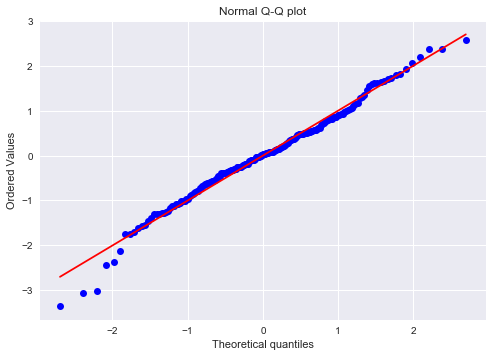

In [80]:
#Checking normality of the residuals using QQ plot

influence1 = pd.Series(model2_fit1_css.resid)

z = (influence1-np.mean(influence1))/np.std(influence1)

scp.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()


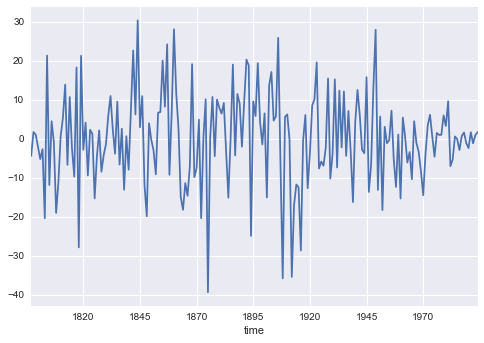

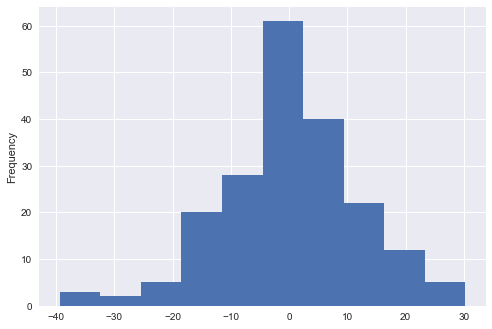

count    198.000000
mean       0.010389
std       11.753445
min      -39.406915
25%       -6.726862
50%        0.383418
75%        6.577418
max       30.291178
dtype: float64


In [81]:
#Plotting histogram of residuals

influence1.plot()
plt.show()
influence1.plot(kind='hist')
#To get density curve form, use kind = 'kde'
plt.show()
print(influence1.describe())

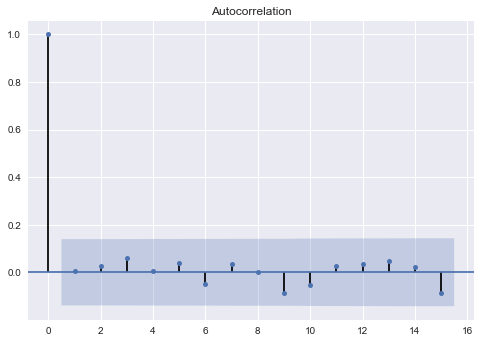

In [82]:
#Creating the ACF plot of the residuals

sm.graphics.tsa.plot_acf(influence1, lags=15);


In [83]:
#The diagnostic plots of the residuals seems ok. We can proceed with ARIMA (2,1,2) for forecasting.

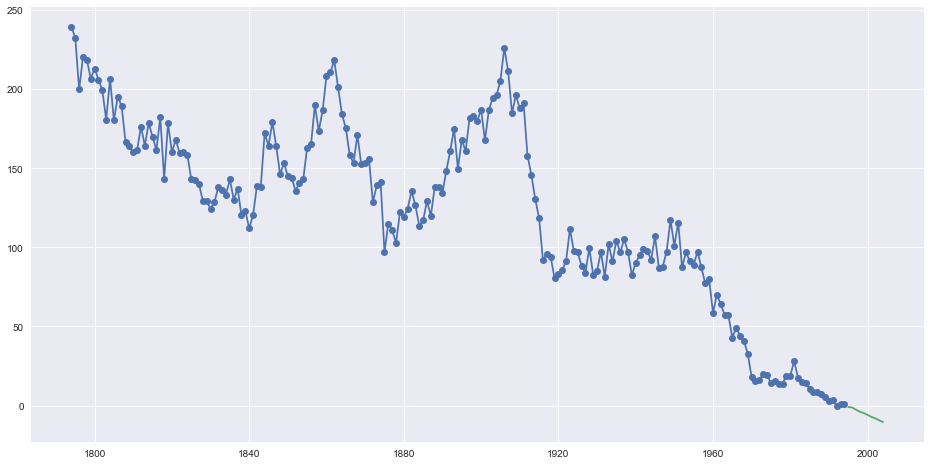

In [84]:
# Forecasting using predict function - for defined periods
# Unlike in R, there is no easy function to convert the differenced and transformed series into the original scale
# It needs to be manually converted to the original scale

n_periods = 10
fc_pre = model2_fit1_css.predict('1995-01-01','2004-01-01', typ='levels')
#typ='levels' allows the predictions to be in the original and not differenced format

#Plotting the forecast with the transformed series input data
plt.figure(figsize=(16,8))
plt.plot(arimadata_transformed.arimadata_transformed,'-o')
plt.plot(fc_pre)
plt.show()

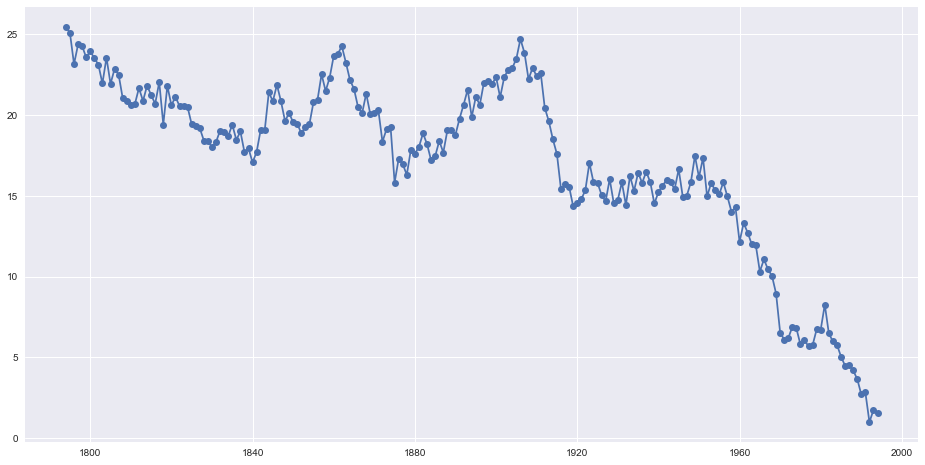

In [85]:
# Forecasting using forecast function - for number of steps ahead
# Unlike in R, there is no easy function to convert the transformed series into the original scale 
# in the forecast function - it needs to be manually converted to the original scale

#Number of ahead steps
n_periods = 10
fc,se,confint = model2_fit1_css.forecast(n_periods)

index_of_fc = pd.date_range(start='1995-01-01', freq='YS',periods=10) #include dates for the periods ahead
fc_series = pd.DataFrame(fc, index=index_of_fc)

# Taking back the transformation for the forecasted values manually to get it into the original scale
from scipy.special import boxcox, inv_boxcox

#We use inv_boxcox on the transformed series to get the original series back
#For this, we need to provide the lambda value used to transform the series at first
fc_series_original = pd.DataFrame(inv_boxcox(fc_series, lambda1_))
#This returns the values to Nan since the forecasted values of the simulated data are negative and thus they are
#not plotted

#Plotting the forecast with the original series input data
plt.figure(figsize=(16,8))
plt.plot(arima_data,'-o')
plt.plot(fc_series_original, label='forecast')
plt.show()

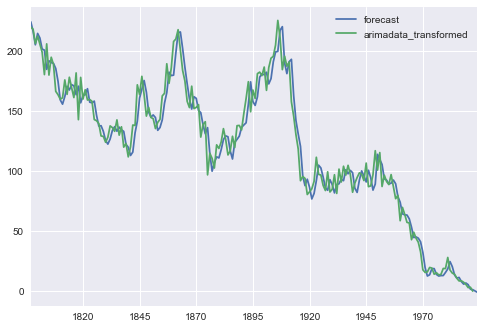

In [86]:
#We can use plot_predict to show us the fitted vs actual values (but this gives the transformed version)

model2_fit1_css.plot_predict(dynamic=False)
plt.show()